In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


<Axes: >

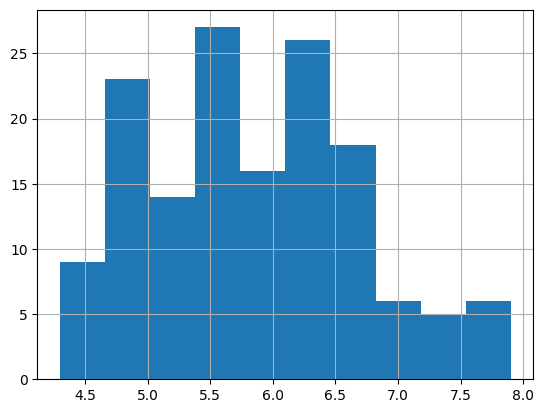

In [ ]:
df['sepal_length'].hist()

<Axes: >

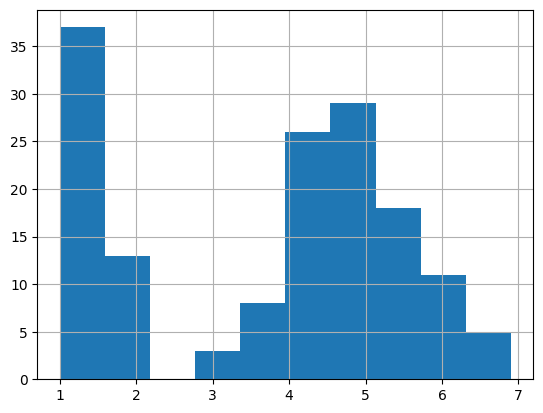

In [ ]:
df['petal_length'].hist()

In [ ]:
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

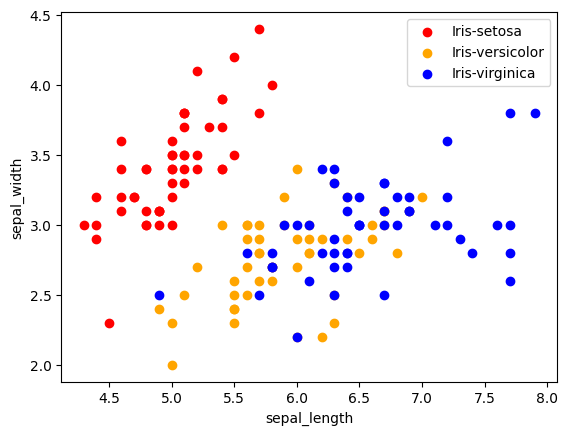

In [ ]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'], c = colors[i],label=species[i])
  plt.xlabel('sepal_length')
  plt.ylabel('sepal_width')
  plt.legend()

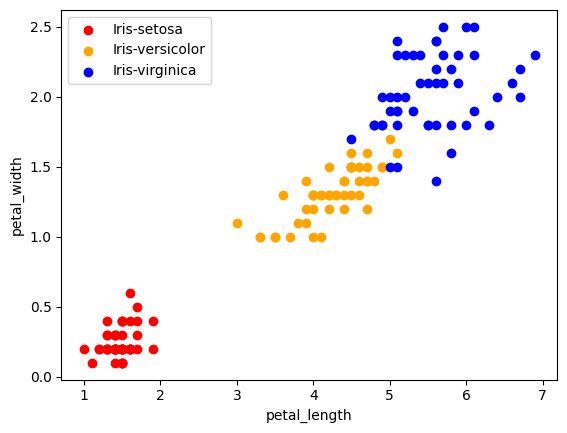

In [ ]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['petal_length'],x['petal_width'], c = colors[i],label=species[i])
  plt.xlabel('petal_length')
  plt.ylabel('petal_width')
  plt.legend()

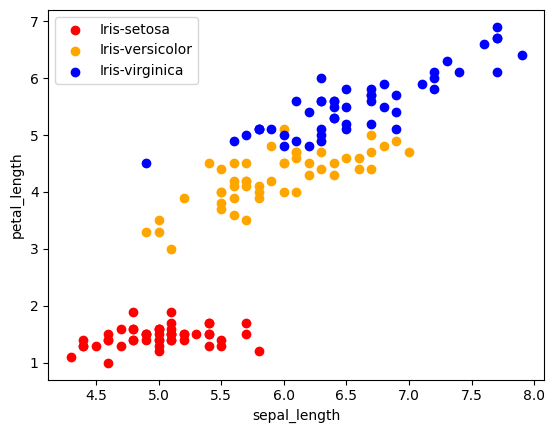

In [ ]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'], c = colors[i],label=species[i])
  plt.xlabel('sepal_length')
  plt.ylabel('petal_length')
  plt.legend()

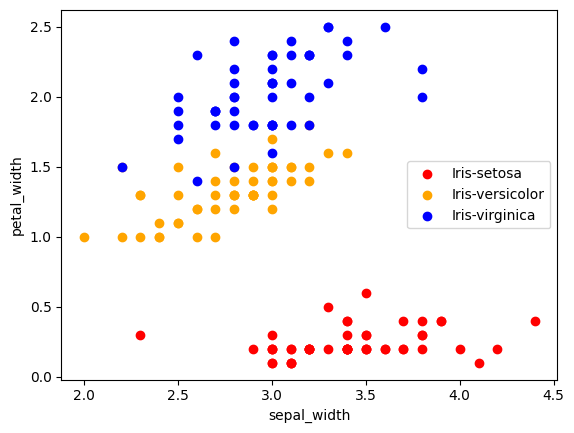

In [ ]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_width'],x['petal_width'], c = colors[i],label=species[i])
  plt.xlabel('sepal_width')
  plt.ylabel('petal_width')
  plt.legend()

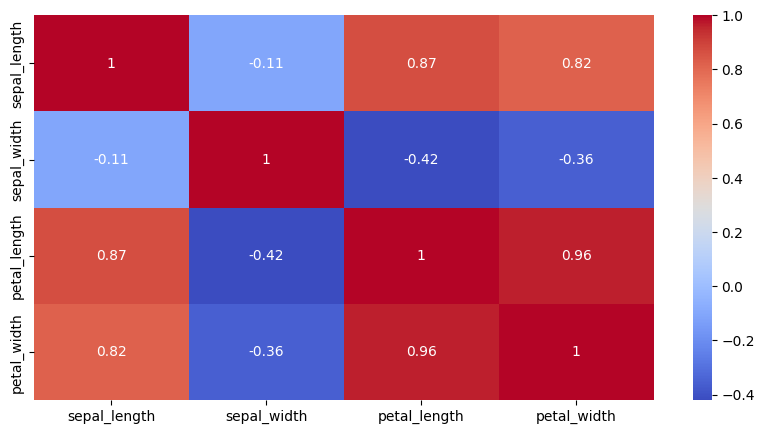

In [ ]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['species'])
Y = df['species']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  100.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
print("Accuracy ",model.score(x_test,y_test)*100)

Accuracy  100.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Accuracy ",model.score(x_test,y_test)*100)

Accuracy  97.77777777777777


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
model_accuracy = r2_score(y_test,y_predict)*100
model_accuracy

96.71532846715328